In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [28]:
from sklearn.linear_model import LogisticRegression

X = iris.data[:, 2:]
y = (iris["target"] == 2).astype(np.int)

/tmp/ipykernel_17421/23956073.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


In [29]:
lr = LogisticRegression(random_state=31)
lr.fit(X, y)

LogisticRegression(random_state=31)

In [30]:
lr.coef_, lr.intercept_

(array([[2.77762524, 2.38552012]]), array([-17.5481106]))

In [31]:
lr.predict_proba([[5, 2]])

array([[0.2476741, 0.7523259]])

In [32]:
lr.decision_function([[5, 1.565]])

array([0.07335457])

In [33]:
lr.predict_proba([[5, 1.565]])

array([[0.48166958, 0.51833042]])

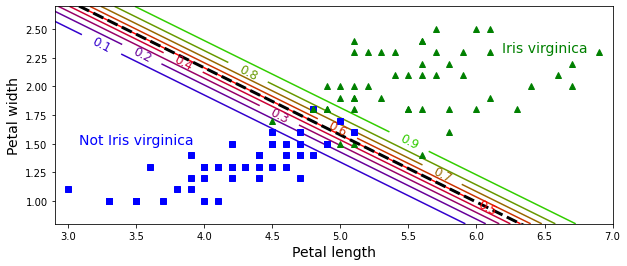

In [44]:
import numpy as np
import matplotlib.pyplot as plt

lr = LogisticRegression(solver="lbfgs", C=10**2)
lr.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = lr.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, 10, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(lr.coef_[0][0] * left_right + lr.intercept_[0]) / lr.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
# save_fig("logistic_regression_contour_plot")
plt.show()

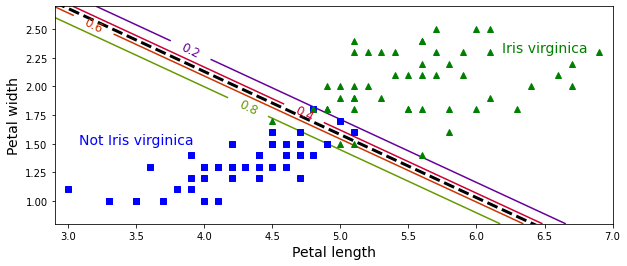

In [41]:

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 0].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, 10, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(lr.coef_[0][0] * left_right + lr.intercept_[0]) / lr.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
# save_fig("logistic_regression_contour_plot")
plt.show()